In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#Visualization with Python
import matplotlib.pyplot as plt

#statistical data visualization
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


data = pd.read_csv('../input/acs-classification-income-local-xanthi/training_set.csv')
data_val = pd.read_csv('../input/acs-classification-income-local-xanthi/validation_set.csv')


#name = "CNN.csv"
#predictions_utility.to_csv('/kaggle/working/' + name , index=False)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/acs-classification-income-local-xanthi/sample_submission.csv
/kaggle/input/acs-classification-income-local-xanthi/validation_set.csv
/kaggle/input/acs-classification-income-local-xanthi/training_set.csv
/kaggle/input/acs-classification-income-local-xanthi/prediction_utility.py


In [2]:
#get the first n rows
data.head()

,AGE,WORKER-CLASS,EDUCATION,MARITAL-STATUS,OCCUPATION,PLACE-OF-BIRTH,RELATIONSHIP,WORK-HOURS,SEX,RACE,INCOME
0,65,NaN,15.0,1,NaN,6,1,NaN,2,1,7800.0
1,80,NaN,22.0,5,NaN,6,0,NaN,2,1,61300.0
2,72,NaN,21.0,3,NaN,233,6,NaN,1,6,10800.0
3,47,1.0,21.0,1,10.0,36,1,60.0,1,1,493000.0
4,25,NaN,16.0,1,NaN,6,10,NaN,2,8,0.0


In [3]:
#Generate descriptive statistics
data.describe()

,AGE,WORKER-CLASS,EDUCATION,MARITAL-STATUS,OCCUPATION,PLACE-OF-BIRTH,RELATIONSHIP,WORK-HOURS,SEX,RACE,INCOME
count,297733.000000,218527.000000,297733.000000,297733.000000,218527.000000,297733.000000,297733.000000,192038.000000,297733.000000,297733.000000,2.977330e+05
mean,48.244504,2.219831,17.878273,2.544995,4097.515923,95.695116,2.798927,37.938996,1.511391,2.991402,4.734245e+04
std,18.622444,1.996660,4.372900,1.781345,2618.358754,122.800185,4.792724,12.873369,0.499871,2.868330,7.083729e+04
min,18.000000,1.000000,1.000000,1.000000,10.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000e+00
25%,32.000000,1.000000,16.000000,1.000000,2100.000000,6.000000,0.000000,32.000000,1.000000,1.000000,8.850000e+03
50%,48.000000,1.000000,19.000000,1.000000,4220.000000,17.000000,1.000000,40.000000,2.000000,1.000000,2.530000e+04
75%,62.000000,3.000000,21.000000,5.000000,5620.000000,212.000000,2.000000,40.000000,2.000000,6.000000,6.000000e+04
max,94.000000,9.000000,24.000000,5.000000,9920.000000,554.000000,17.000000,99.000000,2.000000,9.000000,1.259000e+06


In [4]:
#create Age_band
data['Age_band']=0
data.loc[data['AGE']<=19,'Age_band']=0
data.loc[(data['AGE']>19)&(data['AGE']<=35),'Age_band']=1
data.loc[(data['AGE']>36)&(data['AGE']<=55),'Age_band']=2
data.loc[(data['AGE']>56)&(data['AGE']<=75),'Age_band']=3
data.loc[data['AGE']>76,'Age_band']=4
data.head()

,AGE,WORKER-CLASS,EDUCATION,MARITAL-STATUS,OCCUPATION,PLACE-OF-BIRTH,RELATIONSHIP,WORK-HOURS,SEX,RACE,INCOME,Age_band
0,65,NaN,15.0,1,NaN,6,1,NaN,2,1,7800.0,3
1,80,NaN,22.0,5,NaN,6,0,NaN,2,1,61300.0,4
2,72,NaN,21.0,3,NaN,233,6,NaN,1,6,10800.0,3
3,47,1.0,21.0,1,10.0,36,1,60.0,1,1,493000.0,2
4,25,NaN,16.0,1,NaN,6,10,NaN,2,8,0.0,1


In [5]:
#create Income_band
data.loc[(data['INCOME'] >= 50000), 'Income_band'] = 1
data.loc[(data['INCOME'] <  50000), 'Income_band'] = 0
data.head()

,AGE,WORKER-CLASS,EDUCATION,MARITAL-STATUS,OCCUPATION,PLACE-OF-BIRTH,RELATIONSHIP,WORK-HOURS,SEX,RACE,INCOME,Age_band,Income_band
0,65,NaN,15.0,1,NaN,6,1,NaN,2,1,7800.0,3,0.0
1,80,NaN,22.0,5,NaN,6,0,NaN,2,1,61300.0,4,1.0
2,72,NaN,21.0,3,NaN,233,6,NaN,1,6,10800.0,3,0.0
3,47,1.0,21.0,1,10.0,36,1,60.0,1,1,493000.0,2,1.0
4,25,NaN,16.0,1,NaN,6,10,NaN,2,8,0.0,1,0.0


In [6]:
#representing the dimensionality 
data.shape


(297733, 13)

In [7]:
#checking the number of passenegers in each band
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')

,Age_band
2,93178
1,80145
3,79943
0,22605
4,21862


In [8]:
#see the columns
data.columns

Index(['AGE', 'WORKER-CLASS', 'EDUCATION', 'MARITAL-STATUS', 'OCCUPATION',
       'PLACE-OF-BIRTH', 'RELATIONSHIP', 'WORK-HOURS', 'SEX', 'RACE', 'INCOME',
       'Age_band', 'Income_band'],
      dtype='object')

In [9]:
#Create a Correlation Matrix
data.corr()

,AGE,WORKER-CLASS,EDUCATION,MARITAL-STATUS,OCCUPATION,PLACE-OF-BIRTH,RELATIONSHIP,WORK-HOURS,SEX,RACE,INCOME,Age_band,Income_band
AGE,1.000000,0.182604,-0.071672,-0.448609,-0.085139,0.074499,-0.191641,0.067872,0.049781,-0.153842,0.097226,0.854770,0.076130
WORKER-CLASS,0.182604,1.000000,0.063242,-0.096770,-0.008772,-0.027824,-0.057640,-0.042285,-0.013038,-0.069923,0.036650,0.148791,0.029218
EDUCATION,-0.071672,0.063242,1.000000,-0.020597,-0.392080,-0.307302,-0.136955,0.055307,0.000118,-0.133724,0.284905,-0.058386,0.331503
MARITAL-STATUS,-0.448609,-0.096770,-0.020597,1.000000,0.099030,-0.170655,0.371148,-0.133926,-0.038021,0.047817,-0.182263,-0.383681,-0.194110
OCCUPATION,-0.085139,-0.008772,-0.392080,0.099030,1.000000,0.108700,0.124476,-0.057878,-0.111774,0.078919,-0.298641,-0.070466,-0.328617
PLACE-OF-BIRTH,0.074499,-0.027824,-0.307302,-0.170655,0.108700,1.000000,-0.033591,0.033579,0.020673,0.318452,-0.071193,0.068786,-0.095594
RELATIONSHIP,-0.191641,-0.057640,-0.136955,0.371148,0.124476,-0.033591,1.000000,-0.079929,-0.048196,0.049116,-0.193143,-0.168978,-0.221056
WORK-HOURS,0.067872,-0.042285,0.055307,-0.133926,-0.057878,0.033579,-0.079929,1.000000,-0.171656,-0.017572,0.307719,0.053063,0.346906
SEX,0.049781,-0.013038,0.000118,-0.038021,-0.111774,0.020673,-0.048196,-0.171656,1.000000,0.006004,-0.155222,0.043108,-0.145030
RACE,-0.153842,-0.069923,-0.133724,0.047817,0.078919,0.318452,0.049116,-0.017572,0.006004,1.000000,-0.091301,-0.127833,-0.093163


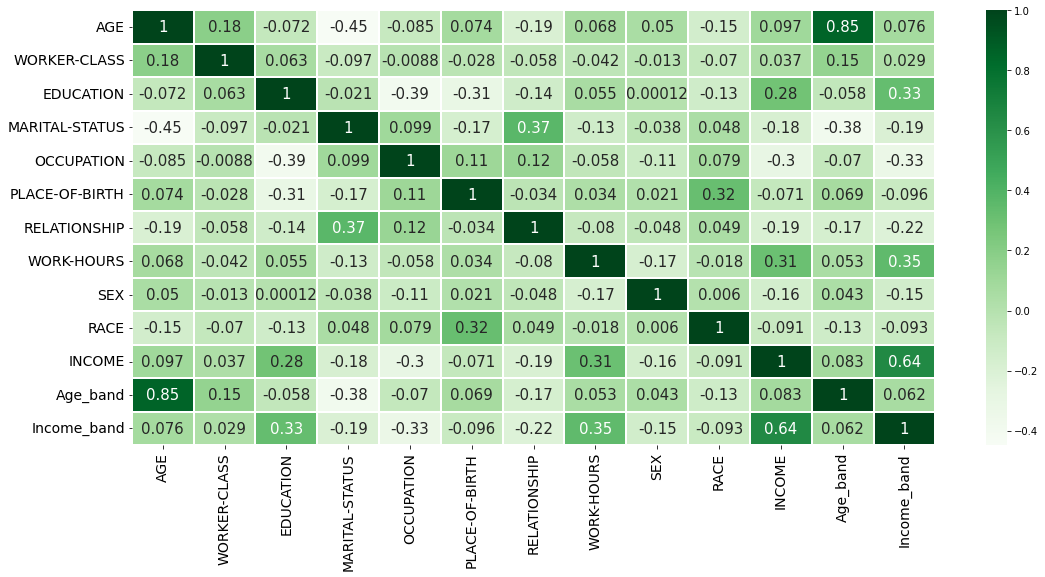

In [10]:
#Create a Correlation Matrix2
sns.heatmap(data.corr(),annot=True,cmap='Greens',linewidths=0.3,annot_kws={'size':15})
fig=plt.gcf()
fig.set_size_inches(18,8)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [11]:
#drop columns
data.drop(['AGE', 'WORKER-CLASS', 'PLACE-OF-BIRTH', 'INCOME'], axis=1,inplace=True)

In [12]:
data.head()

,EDUCATION,MARITAL-STATUS,OCCUPATION,RELATIONSHIP,WORK-HOURS,SEX,RACE,Age_band,Income_band
0,15.0,1,NaN,1,NaN,2,1,3,0.0
1,22.0,5,NaN,0,NaN,2,1,4,1.0
2,21.0,3,NaN,6,NaN,1,6,3,0.0
3,21.0,1,10.0,1,60.0,1,1,2,1.0
4,16.0,1,NaN,10,NaN,2,8,1,0.0


In [13]:
data.describe()

,EDUCATION,MARITAL-STATUS,OCCUPATION,RELATIONSHIP,WORK-HOURS,SEX,RACE,Age_band,Income_band
count,297733.000000,297733.000000,218527.000000,297733.000000,192038.000000,297733.000000,297733.000000,297733.000000,297733.000000
mean,17.878273,2.544995,4097.515923,2.798927,37.938996,1.511391,2.991402,1.994330,0.310856
std,4.372900,1.781345,2618.358754,4.792724,12.873369,0.499871,2.868330,1.065396,0.462845
min,1.000000,1.000000,10.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,1.000000,2100.000000,0.000000,32.000000,1.000000,1.000000,1.000000,0.000000
50%,19.000000,1.000000,4220.000000,1.000000,40.000000,2.000000,1.000000,2.000000,0.000000
75%,21.000000,5.000000,5620.000000,2.000000,40.000000,2.000000,6.000000,3.000000,1.000000
max,24.000000,5.000000,9920.000000,17.000000,99.000000,2.000000,9.000000,4.000000,1.000000


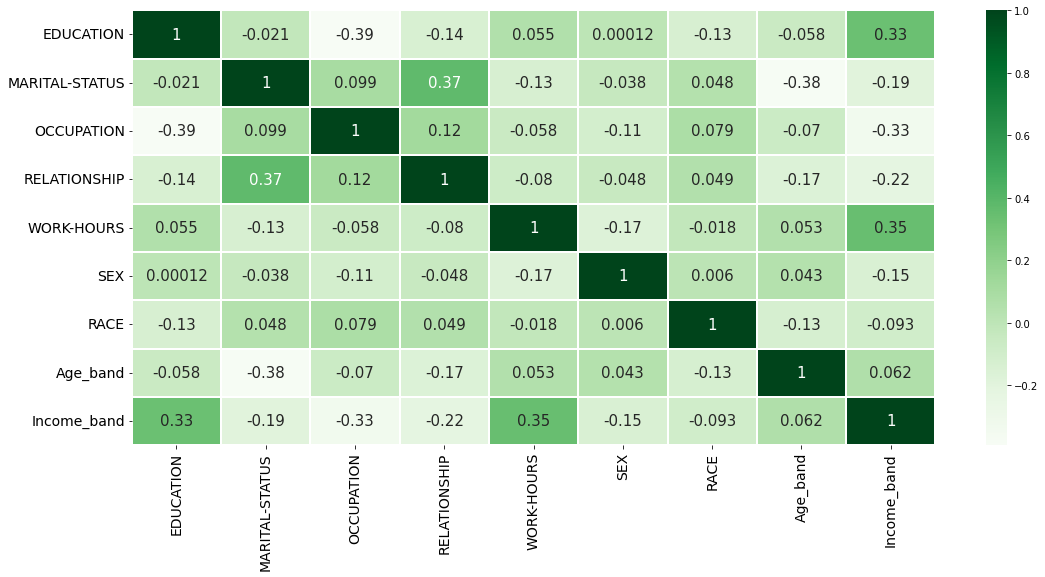

In [14]:
#Create a Correlation Matrix2
sns.heatmap(data.corr(),annot=True,cmap='Greens',linewidths=0.3,annot_kws={'size':15})
fig=plt.gcf()
fig.set_size_inches(18,8)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [15]:
#check null data
data.isnull().sum()

EDUCATION              0
MARITAL-STATUS         0
OCCUPATION         79206
RELATIONSHIP           0
WORK-HOURS        105695
SEX                    0
RACE                   0
Age_band               0
Income_band            0
dtype: int64

In [16]:
#drop null data
new_data = data.dropna()

In [17]:
#check null data in new data
new_data.isnull().sum()

EDUCATION         0
MARITAL-STATUS    0
OCCUPATION        0
RELATIONSHIP      0
WORK-HOURS        0
SEX               0
RACE              0
Age_band          0
Income_band       0
dtype: int64

In [18]:
#new_data.reset_index(drop=True)
new_data.head()

,EDUCATION,MARITAL-STATUS,OCCUPATION,RELATIONSHIP,WORK-HOURS,SEX,RACE,Age_band,Income_band
3,21.0,1,10.0,1,60.0,1,1,2,1.0
6,16.0,1,4965.0,1,40.0,2,1,3,1.0
8,21.0,4,4220.0,0,30.0,1,1,2,0.0
9,22.0,5,2310.0,2,40.0,2,6,1,1.0
10,17.0,5,6050.0,2,40.0,1,1,1,0.0


In [19]:
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


train,test=train_test_split(new_data,test_size=0.2,random_state=0)
train_X=train[train.columns[:8]].to_numpy()
train_Y=train[train.columns[8:]].to_numpy().ravel()
test_X=test[test.columns[:8]].to_numpy()
test_Y=test[test.columns[8:]].to_numpy().ravel()

In [20]:
print(train_X.shape, train_Y.shape, test_X.shape, test_Y.shape )

(153630, 8) (153630,) (38408, 8) (38408,)


In [21]:
# initialize classifier
classifier = RandomForestClassifier(random_state=0)

# train the classifier
classifier.fit(train_X,train_Y)

# make predictions on train/test set
y_pred_train = classifier.predict(train_X)
y_pred = classifier.predict(test_X)

# calculate scores
accuracy_train = accuracy_score(y_pred_train, train_Y)
precision_train = precision_score(y_pred_train, train_Y)
recall_train = recall_score(y_pred_train, train_Y)
f1_train = f1_score(y_pred_train, train_Y)

accuracy = accuracy_score(y_pred, test_Y)
precision = precision_score(y_pred, test_Y)
recall = recall_score(y_pred, test_Y)
f1 = f1_score(y_pred, test_Y)

print(f"[Training set] Accuracy: {accuracy_train:.4f}, Precision: {precision_train:.4f}, Recall: {recall_train:.4f}, F1: {f1_train:.4f}\n",
      f"[Testing set] Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")

[Training set] Accuracy: 0.9552, Precision: 0.9553, Recall: 0.9397, F1: 0.9474
 [Testing set] Accuracy: 0.7876, Precision: 0.7446, Recall: 0.7504, F1: 0.7475
